In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [4]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [5]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [ ]:
## looking at Moving average and Exponential weighted average

In [6]:


airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

In [8]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN
1949-06-01,135.0,124.500000,NaN
1949-07-01,148.0,130.500000,NaN
1949-08-01,148.0,135.500000,NaN
1949-09-01,136.0,136.166667,NaN


<AxesSubplot:xlabel='Month'>

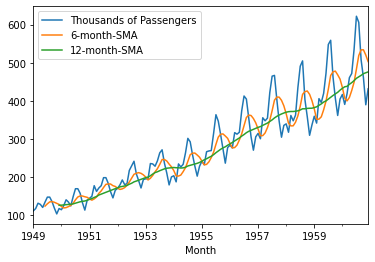

In [9]:
airline.plot()

<AxesSubplot:xlabel='Month'>

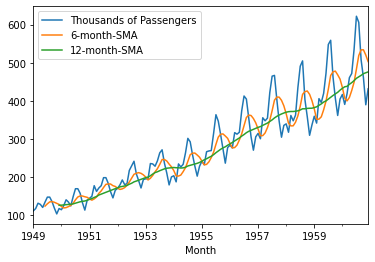

In [10]:
airline.plot()

<AxesSubplot:xlabel='Month'>

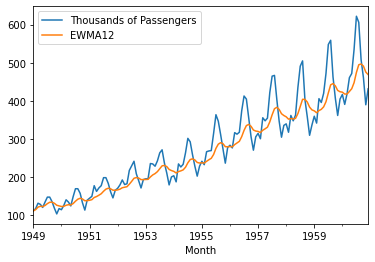

In [12]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

airline[['Thousands of Passengers','EWMA12']].plot()

In [15]:
# trend, cycle
 # dissociate trend and cycle components 

# Hodrick-Prescott filter
cycle, trend = sm.tsa.filters.hpfilter( airline['Thousands of Passengers'])

In [16]:
airline["trend"] = trend
airline["cycle"] = cycle

<AxesSubplot:xlabel='Month'>

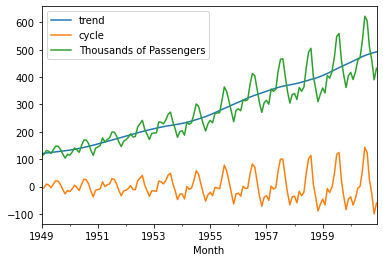

In [19]:
airline[['trend','cycle','Thousands of Passengers']].plot()

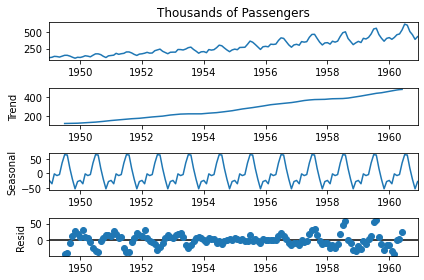

In [24]:
# error trend seasonality analysis

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')
ref=result.plot()

In [25]:
# testing if data is stationary or not 

In [26]:
from statsmodels.tsa.stattools import adfuller

In [32]:
_,pval,_,_,_,_ = adfuller(airline['Thousands of Passengers'])

In [34]:
pval   # not able to discard null hypotheses

0.9918802434376411

In [39]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [43]:
# taking first diffrence

airline['first_diff'] = airline['Thousands of Passengers'] - airline['Thousands of Passengers'].shift(1)

In [44]:
ts=airline['first_diff'].dropna() 

In [40]:
adf_check(ts)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.8292668241700034
p-value : 0.054213290283824954
#Lags Used : 12
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

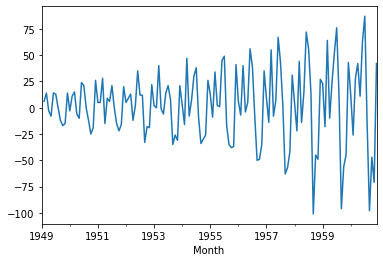

In [46]:
airline["first_diff"].plot()

In [47]:
airline["second_diff"]= airline["first_diff"]- airline["first_diff"].shift(1)

In [48]:
ts=airline['second_diff'].dropna() 

In [49]:
adf_check(ts)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.384231542468488
p-value : 2.7328918500143186e-29
#Lags Used : 11
Number of Observations Used : 130
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

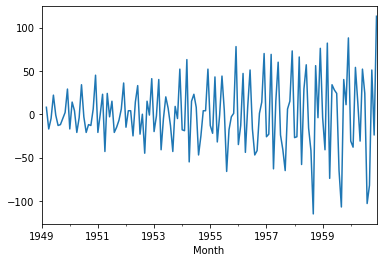

In [51]:
airline["second_diff"].plot()

In [52]:
airline["third_diff"]= airline["second_diff"]-airline["second_diff"].shift(1)

In [53]:
ts=airline['third_diff'].dropna() 

In [54]:
adf_check(ts)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.384231542468488
p-value : 2.7328918500143186e-29
#Lags Used : 11
Number of Observations Used : 130
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

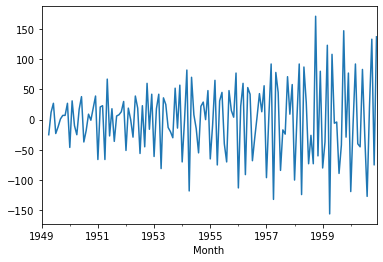

In [86]:
airline['third_diff'].plot()  # we decide d= 3

In [57]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [58]:
# ploting partial correlation funtion

In [59]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,trend,cycle,First Difference,first_diff,second_diff,third_diff
Month,,,,,,,,,,
1949-01-01,112.0,NaN,NaN,112.000000,120.625586,-8.625586,NaN,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,115.250000,121.651911,-3.651911,6.0,6.0,NaN,NaN
1949-03-01,132.0,NaN,NaN,121.787529,122.672845,9.327155,14.0,14.0,8.0,NaN
1949-04-01,129.0,NaN,NaN,124.064224,123.680714,5.319286,-3.0,-3.0,-17.0,-25.0
1949-05-01,121.0,NaN,NaN,123.231685,124.673675,-3.673675,-8.0,-8.0,-5.0,12.0


In [61]:
airline.first_diff.plot?

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

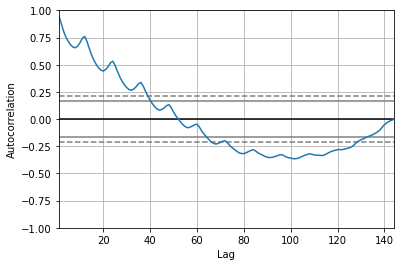

In [71]:
pd.plotting.autocorrelation_plot(airline['Thousands of Passengers'])

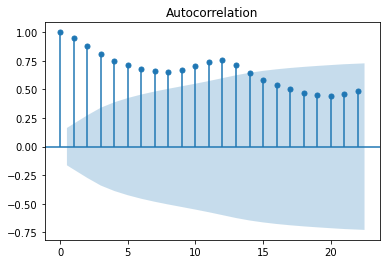

In [72]:
fig=plot_acf(airline['Thousands of Passengers'])

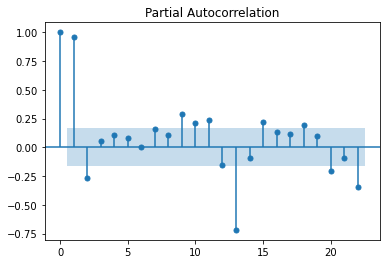

In [73]:
fig=plot_pacf(airline['Thousands of Passengers'])
# we decide p=2 

In [67]:
# after 2nd lag autocorrelation goes off 

In [68]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [91]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(airline['Thousands of Passengers'],order=(2,3,5), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\shris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shris\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 3, 5)x(1, 1, [1], 12)   Log Likelihood                -504.742
Date:                              Thu, 12 Aug 2021   AIC                           1029.485
Time:                                      19:55:26   BIC                           1058.083
Sample:                                  01-01-1949   HQIC                          1041.105
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8136      0.158    -11.468      0.000      -2.124      -1.504
ar.L2         -0.84

C:\Users\shris\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

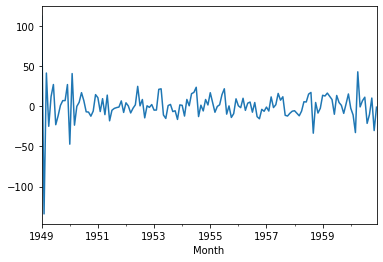

In [92]:
results.resid.plot()

<AxesSubplot:xlabel='Month'>

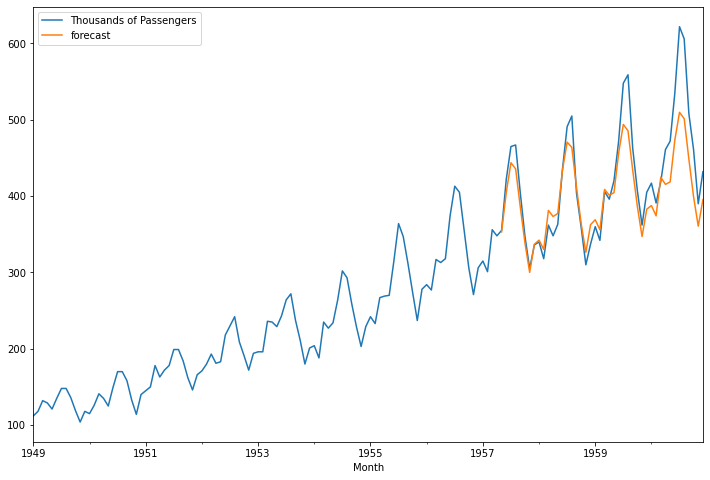

In [93]:
airline['forecast'] = results.predict(start = 100, end= 148, dynamic= True)  
airline[['Thousands of Passengers','forecast']].plot(figsize=(12,8))

In [85]:
from sklearn.metrics import r2_score

r2_score(airline['Thousands of Passengers'].iloc[100:148],airline['forecast'].iloc[100:148])

0.7639001383424636